# Analysis and Visualization of Complex Agro-Environmental Data
---
## Descriptive statistics

As an example we will work on a subset of a database that resulted from integrating information from several river fish biomonitoring programmes accross Europe. This subset includes data for some Mediterranean countries. Each case (rows) corresponds to a fish sampling point. Variables (columns) includes coordinates, country and catchment identifiers, local scale environmental variables, climatic variables, human pressures and fish presence/absence data.

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

We will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

#### Import, visualize and summarize table properties

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [5]:
# list(df.columns)

#### Clean and reajust the dataset

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True) # axis=1 - columns; inplace=True - the changes will be saved to the original data frame. 

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [7]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
# df.dtypes

In [8]:
# Number of values per variable
# df.count()

### Handling missing data

In [9]:
# Number of missing values (NaN) per variable
# df.isnull().sum()

In [10]:
#df2 = df.dropna(how='all') # drops rows when all elements are missing values
#df2.info()

#df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
#df2.info()

df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


### Numerical summaries

In [11]:
# mean and median (rounded to 2 decimal cases)
mean = round(df['prec_ann_catch'].mean(), 2)
median = round(df['prec_ann_catch'].median(), 2)
print(mean, median)

941.82 968.9


In [12]:
# the catchment with more data
print(df['Catchment_name'].mode()) 

0    Ebro
Name: Catchment_name, dtype: object


In [13]:
# A fast way of getting a summary statistics of quantitative data (int or float)
round(df.describe() ,2) # before dropping NaNs (rounded to 2 decimal cases)

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.00,5011.00,5011.00,4975.00,4402.00,4841.00,4841.00,4841.00,4841.00,4841.00,...,5011.00,5011.00,5011.00,5011.00,5011.00,5011.00,5011.0,5011.00,5011.00,5011.00
mean,41.66,-4.22,428.07,14.58,3.06,785.18,941.82,13.26,6.21,20.60,...,0.00,0.09,0.00,0.00,0.01,0.00,0.2,0.07,0.13,0.03
std,1.65,4.75,342.91,22.60,0.57,432.73,292.50,2.17,2.66,2.58,...,0.02,0.28,0.02,0.02,0.11,0.01,0.4,0.25,0.34,0.17
min,36.21,-9.46,0.00,0.00,1.00,52.25,373.37,3.90,-2.70,11.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,40.45,-7.72,142.00,3.51,3.00,468.39,677.47,12.00,4.30,18.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
50%,42.32,-6.18,375.00,8.00,3.00,701.44,968.90,13.40,6.40,20.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
75%,42.90,-1.96,610.50,17.17,3.00,1049.98,1168.36,14.60,8.30,22.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
max,45.10,15.63,1851.00,774.00,4.00,2545.55,1739.00,18.30,12.50,28.20,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


In [14]:
round(df2.describe() ,2) # after dropping NaNs (rounded to 2 decimal cases)

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,2822.00,...,2822.0,2822.00,2822.00,2822.0,2822.00,2822.0,2822.00,2822.00,2822.00,2822.00
mean,41.93,-6.71,344.70,15.36,3.11,668.77,1069.98,13.43,7.04,19.92,...,0.0,0.08,0.00,0.0,0.00,0.0,0.25,0.04,0.09,0.03
std,1.58,3.20,291.16,24.16,0.62,371.26,250.83,1.91,2.44,2.02,...,0.0,0.27,0.03,0.0,0.02,0.0,0.44,0.20,0.29,0.18
min,36.87,-9.46,1.00,0.00,1.00,52.25,456.28,6.70,-0.20,14.70,...,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
25%,41.21,-8.23,94.00,3.99,3.00,382.21,922.39,12.40,5.30,18.50,...,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
50%,42.54,-7.56,292.00,8.80,3.00,590.00,1074.66,13.50,7.30,19.50,...,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
75%,43.08,-6.73,502.75,18.23,3.00,890.28,1246.04,14.60,8.90,21.00,...,0.0,0.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00
max,43.70,15.51,1440.00,774.00,4.00,2003.13,1739.00,17.50,11.90,25.70,...,0.0,1.00,1.00,0.0,1.00,0.0,1.00,1.00,1.00,1.00


In [15]:
country_count = pd.crosstab(index = df['Country'], columns='count')
# print(country_count)

In [16]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
# print(catchment_count)

### Plotting qualitative data

Check here: https://seaborn.pydata.org/generated/seaborn.catplot.html

##### Barplots (categorical plots)

Number of sites per country

<Axes: xlabel='Country'>

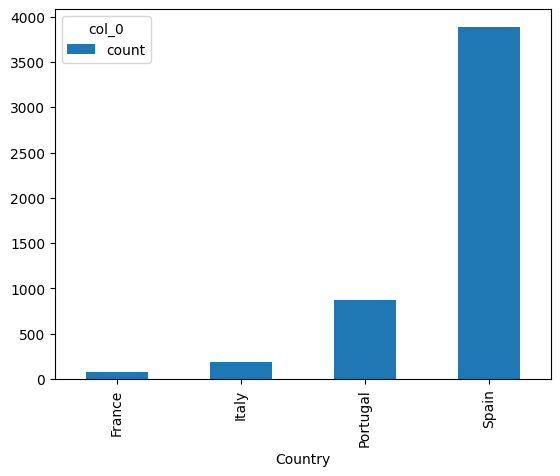

In [17]:
country_count.plot(kind='bar') # using pandas plot method
# plt.show()

<Axes: xlabel='Catchment_name'>

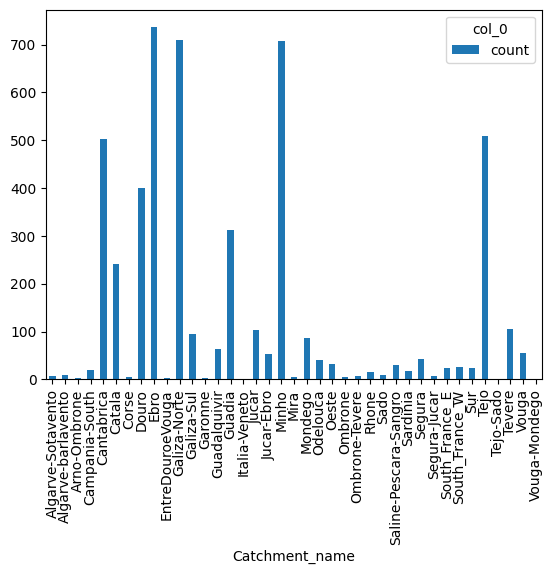

In [18]:
catchment_count.plot(kind='bar') # using pandas plot method
# plt.show()

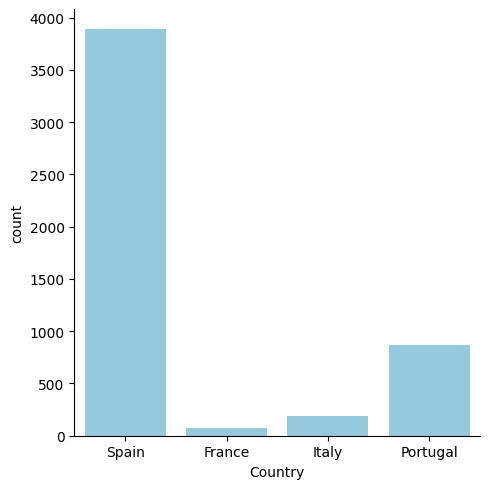

In [19]:
# dataset with NaNs
sns.catplot(x="Country", data=df, kind="count", color="skyblue")
plt.show()

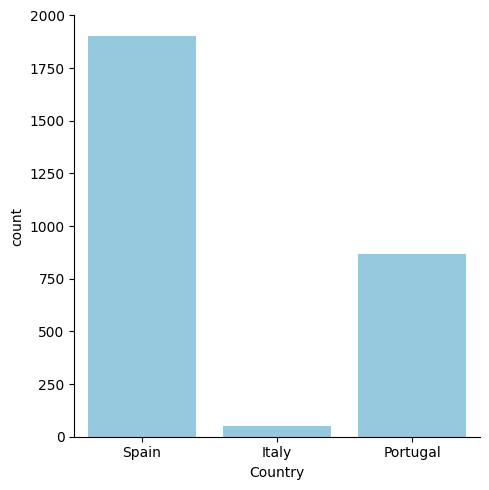

In [20]:
# dataset without NaNs
sns.catplot(x="Country", data=df2, kind="count", color="skyblue")
plt.show()

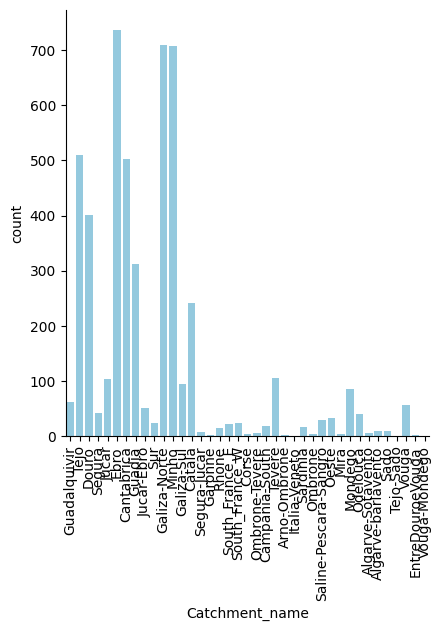

In [21]:
# dataset with NaNs
sns.catplot(x="Catchment_name", data=df, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

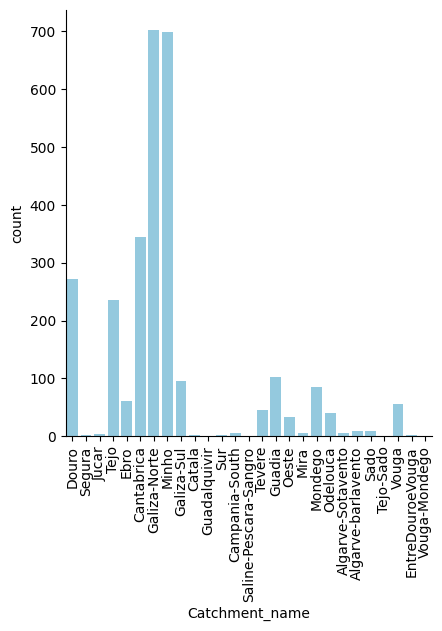

In [22]:
# dataset without NaNs
sns.catplot(x="Catchment_name", data=df2, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

##### Pie charts

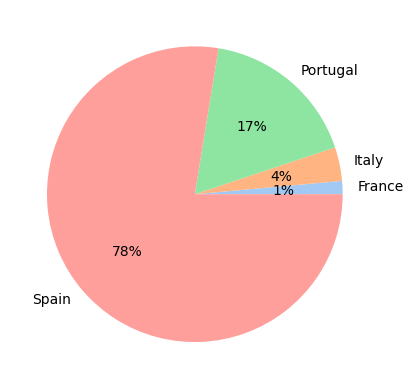

In [23]:
# pie chart
colors = sns.color_palette('pastel')
labels = list(country_count.index) # list of country names
plt.pie(list(country_count.iloc[:,0]), labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

##### Treemaps

To plot treemaps you'll need to install `squarify`: run `pip install squarify` in the terminal.

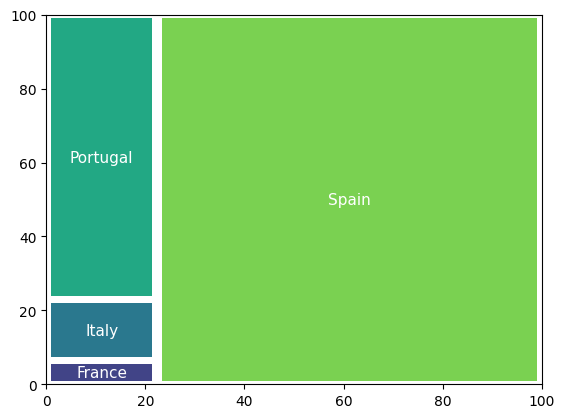

In [24]:
import squarify as sqrf

labels = list(country_count.index) # list of country names

sqrf.plot(sizes=list(country_count.iloc[:,0]), # select all rows from the 1st column of data
          label=labels, # names of countries
          color=sns.color_palette('viridis',n_colors=len(labels)), # color palette
          text_kwargs={'fontsize': 11, 'color':"white"}, # label format
          pad=0.25) # define space between areas
plt.show()


### Plotting quantitative data

#### Strip plots
check here: https://seaborn.pydata.org/generated/seaborn.stripplot.html

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


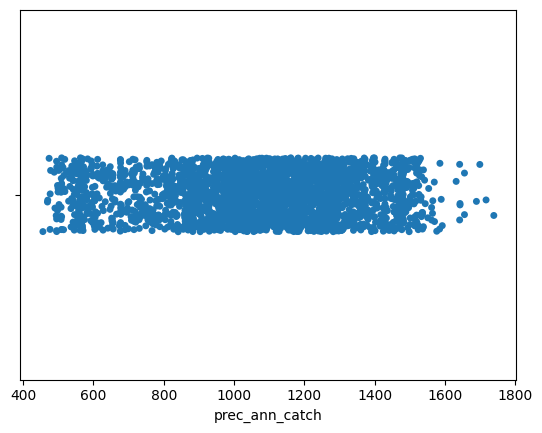

In [25]:
# plot the mean annual total precipitation in the upstream catchment of each site
sns.stripplot(df2['prec_ann_catch'])
plt.show()

#### Histograms
check here: https://seaborn.pydata.org/generated/seaborn.histplot.html

OptionError: No such keys(s): 'mode.use_inf_as_null'

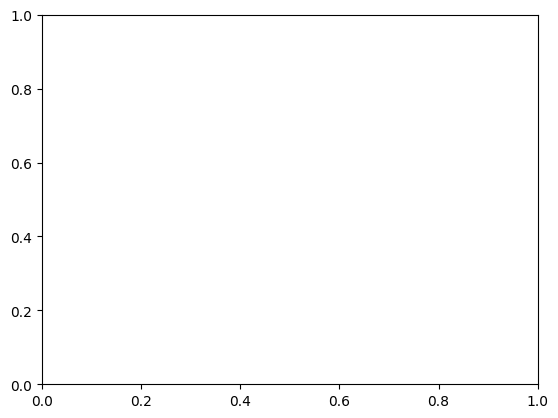

In [26]:
# histogram of the mean annual total precipitation in the upstream catchment of each site
sns.histplot(df2['prec_ann_catch'], kde = False).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

OptionError: No such keys(s): 'mode.use_inf_as_null'

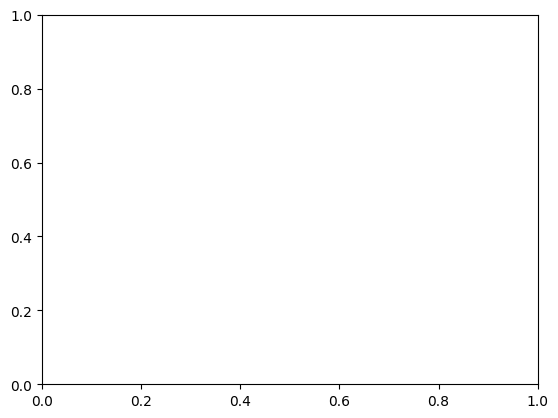

In [27]:
# More variations
sns.histplot(
    df["prec_ann_catch"], 
    kde=True,
    stat="density", # plot proportions instead of frequencies
    kde_kws=dict(cut=3),
    alpha=.4, # transparency
    edgecolor=(1, 1, 1, 0.4), # bar contour lines (r, g, b, alpha)
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

### Bar plots

Check here: https://seaborn.pydata.org/generated/seaborn.barplot.html

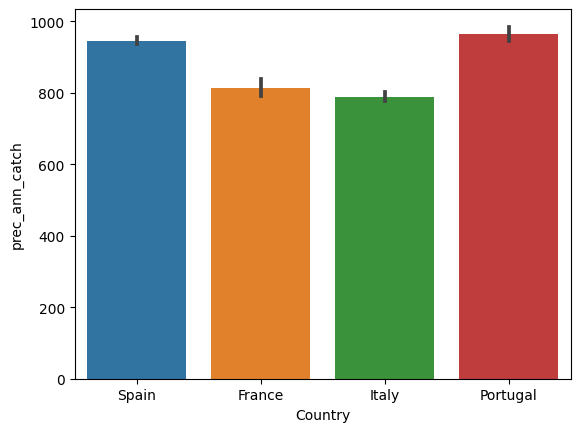

In [28]:
# bar plot of Total Annual Precipitation by country
sns.barplot(x="Country", y="prec_ann_catch", data=df)
plt.show()

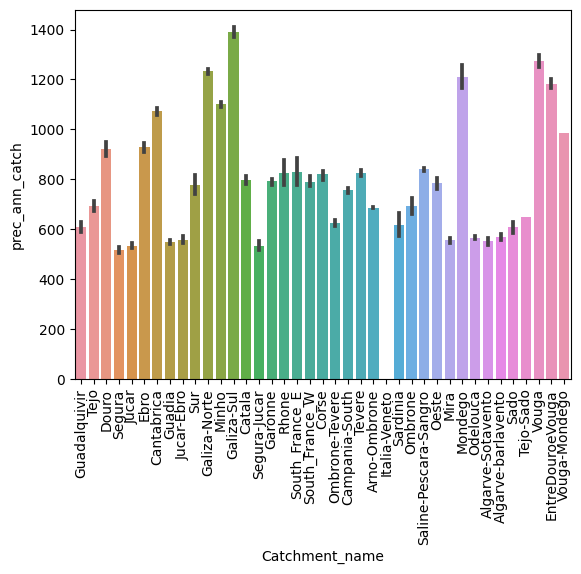

In [29]:
# bar plot of Total Annual Precipitation by catchment
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch")
plt.xticks(rotation=90)
plt.show()

### Boxplots

Check here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


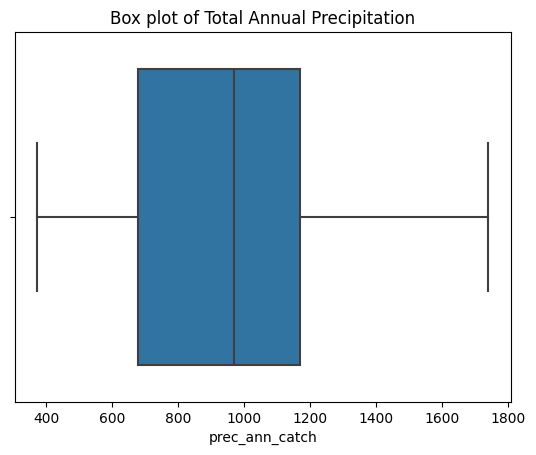

In [30]:
# Box plot of Total Annual Precipitation
sns.boxplot(df["prec_ann_catch"]).set_title("Box plot of Total Annual Precipitation")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


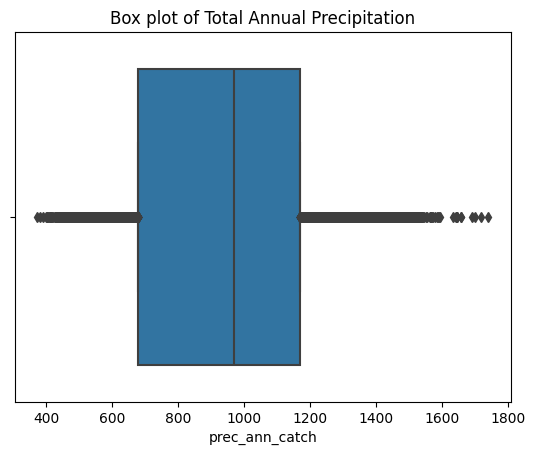

In [31]:
# no whiskers (data points outside the box instead)
sns.boxplot(df["prec_ann_catch"], whis=0).set_title("Box plot of Total Annual Precipitation")
plt.show()

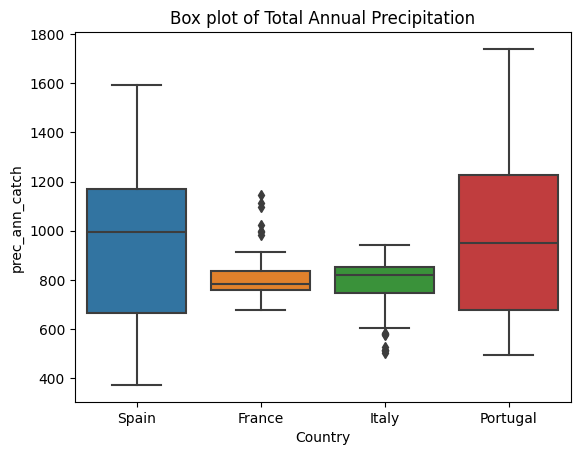

In [32]:
# Box plot of Total Annual Precipitation by country
sns.boxplot(x="Country", y="prec_ann_catch", data=df).set_title("Box plot of Total Annual Precipitation")
plt.show()

OptionError: No such keys(s): 'mode.use_inf_as_null'

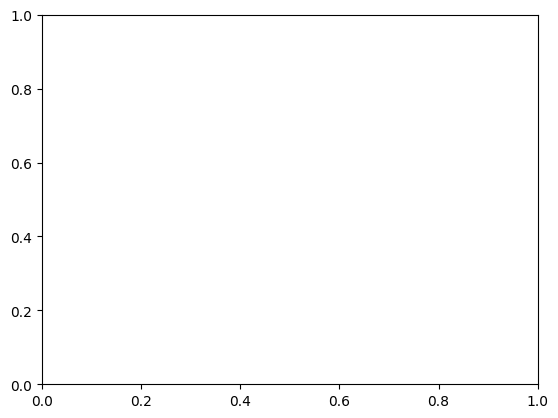

In [33]:
# same thin but only for Portugal

df_port = df[df['Country']=='Portugal']

sns.histplot(
    df_port["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()


### Violin plots

Check here: https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [ ]:
# violin plot of Total Annual Precipitation by country
sns.violinplot(data=df, y="prec_ann_catch").set_title("Violin plot of Total Annual Precipitation")
plt.show()

### Raincloud plots

Raincloud plots combine violin plots, boxplots and strip plots into a single chart. To plot raincloud plots it is helpful to use the `ptitprince` library.

In [ ]:
import ptitprince as pt

In [ ]:
help(pt.RainCloud)

In [ ]:
# Raincloud plot of Total Annual Precipitation

pt.RainCloud(y="prec_ann_catch", data=df, 
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=0.4, # width of the half violin (cloud)
             width_box=0.05, # wdth of the box
             orient='h', # orientation
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.09) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.show()

In [ ]:
# Raincloud plot of Total Annual Precipitation by country

pt.RainCloud(x='Country', y="prec_ann_catch", data=df, 
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=1.2, # width of the half violin (cloud)
             width_box=0.15, # wdth of the box
             orient='h', # orientation
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.09) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.show()

In [ ]:
# Vertical raincloud plot of Total Annual Precipitation by country

pt.RainCloud(x='Country', y="prec_ann_catch", data=df, 
             bw=0.2, # defines how smooth is the distribution curve of the violin plot (cloud)
             width_viol=1.2, # width of the half violin (cloud)
             width_box=0.08, # wdth of the box
             move=0.15, #position of the strip plot
             offset=0,# relative position of the half violin (cloud) in relation to the boxplot
             jitter=0.08) # allows to define the width of the strip plot (rain)

plt.title("Raincloud plot of Total Annual Precipitation")
plt.show()

# Homework to do:
Plot strip plots, histograms and boxplots (and any additional plot that you feel appropriate) of Annual Mean Temperature
(temp_ann) at each of the four catchments with the highest number of fish sampling sites. Try to fit
each type of graph in a single window (4 graphs per window - check how to do it in previous examples I
gave, which are available in github).

In [34]:
# Find the four catchments with the highest number of fish sampling sites
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
top4_catchment_count = catchment_count.sort_values(by='count', ascending=False).head(4).index
top4_df = df[df['Catchment_name'].isin(top4_catchment_count)]
top4_df.head()
# pd.unique(top4_df['Catchment_name'])

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,Pluvial,Permanent,979,Calcareous,2.670,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Catchment_name', ylabel='temp_ann'>

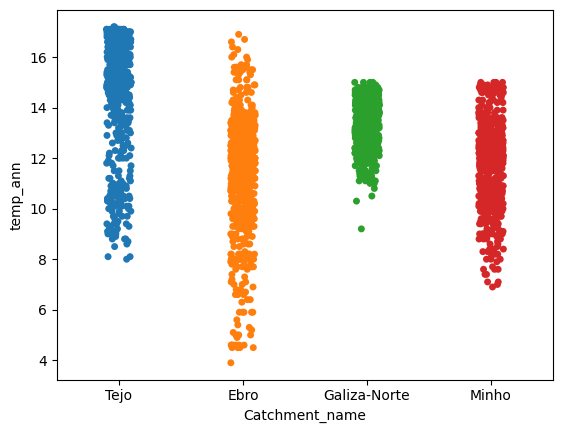

In [35]:
# strip plot for each of the 4 catchments
sns.stripplot(x="Catchment_name", y="temp_ann", data=top4_df)

(array([ 13.,  25., 105., 366., 903., 926., 250.,  36.,   0.]),
 array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 9 artists>)

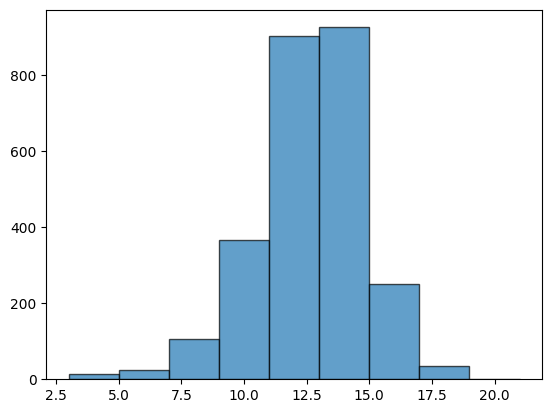

In [36]:
# histograms for each of the 4 catchments, need to bin temperature ranges
column_name = "temp_ann"
data = top4_df[column_name].dropna()
# Creates bins: by 2 degrees
bins = range(int(data.min()), int(data.max()) + 5, 2)
plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)

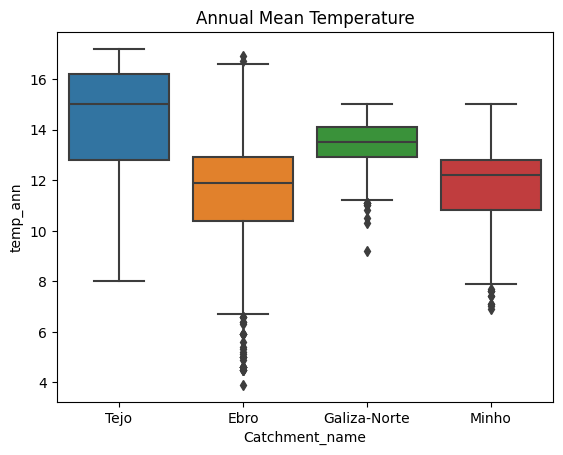

In [37]:
# boxplot for annual mean temp at each of the catchments
sns.boxplot(x="Catchment_name", y="temp_ann", data=top4_df).set_title("Annual Mean Temperature")
plt.show()

- You may change the settings in order to follow the best practices of data visualization (the ones I gave
in the second lesson or other that you feel are also important).
    - I filtered the data and changed the selected plot. I did this because I believe that a bar chart is a better way to depict the data compared to the other plot types.
- Have a deeper look at the three types of plots and evaluate the pros and cons of each type as
univariate visualizations.
    - I find that a histogram isn't the best way to display the data that we're interested in. A histogram is best for when you have one variable that you want to show the distribution of. By using it to examine annual temperature across various locations, you lose the understanding of what is happening at each location.
        - The histogram is able to show you the distribution of temperatures across the top 4 catchments.
            - This could be remedied by splitting out the data by catchment, but is this really practical in the long run? (see attempt below)
    - The strip plot is a bit better for visualizing temperatures at each catchment, but still doesn't give a great idea average temp for example because the points just kind of form a blob.
    - The boxplot is allows us to compare the means at each of the locations

In [55]:
# Plot mean annual temp at each catchment
mean_temps = top4_df.groupby('Catchment_name').mean('temp_ann')
# mean_temps.head()

In [46]:
# To calculate se, you need to use the original df because the means df already calculated the mean - so you only have one value per catchment
sem_df = df.groupby('Catchment_name')['temp_ann'].agg(lambda x: np.std(x, ddof=1) / np.sqrt(len(x))).reset_index()
sem_df.rename(columns={'temp_ann': 'SE'}, inplace=True)
# sem_df.head()

# # Merge SE values back into the original df
mean_temps = mean_temps.merge(sem_df, on='Catchment_name')
# mean_temps.head()

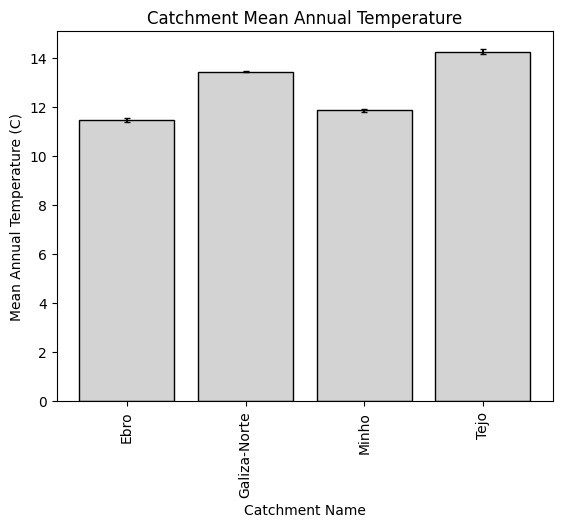

In [47]:
# We don't know what period of time this is over though...
# mean_temps.plot(kind='bar')
# plt.show()
plt.bar(mean_temps['Catchment_name'], mean_temps['temp_ann'], yerr=mean_temps['SE'], capsize=2, color='lightgray', edgecolor='black', align='center')
plt.xlabel('Catchment Name')
plt.ylabel('Mean Annual Temperature (C)')
plt.title('Catchment Mean Annual Temperature')
plt.xticks(rotation=90)

# Show the plot
plt.show()

This plot allows you to visualize the mean annual temperature at each location, calculating an average temperature for each catchment site. By adding the standard error, get an understanding of how accurate the sample mean is. 

To me, it seems that this dataset lacks information about when it was collected. Do we assume that all data was collected in the same year? Was the data collected over several years and we're just missing that column? How was the annual mean temperature calculated?
It seems that the mean annual temperature varies across different sites within the same catchment, so how do we account for that in our visualizations?

Seems like there's not a lot of error between the mean annual temp for the selected catchments. Is mean or SD appropriate here?

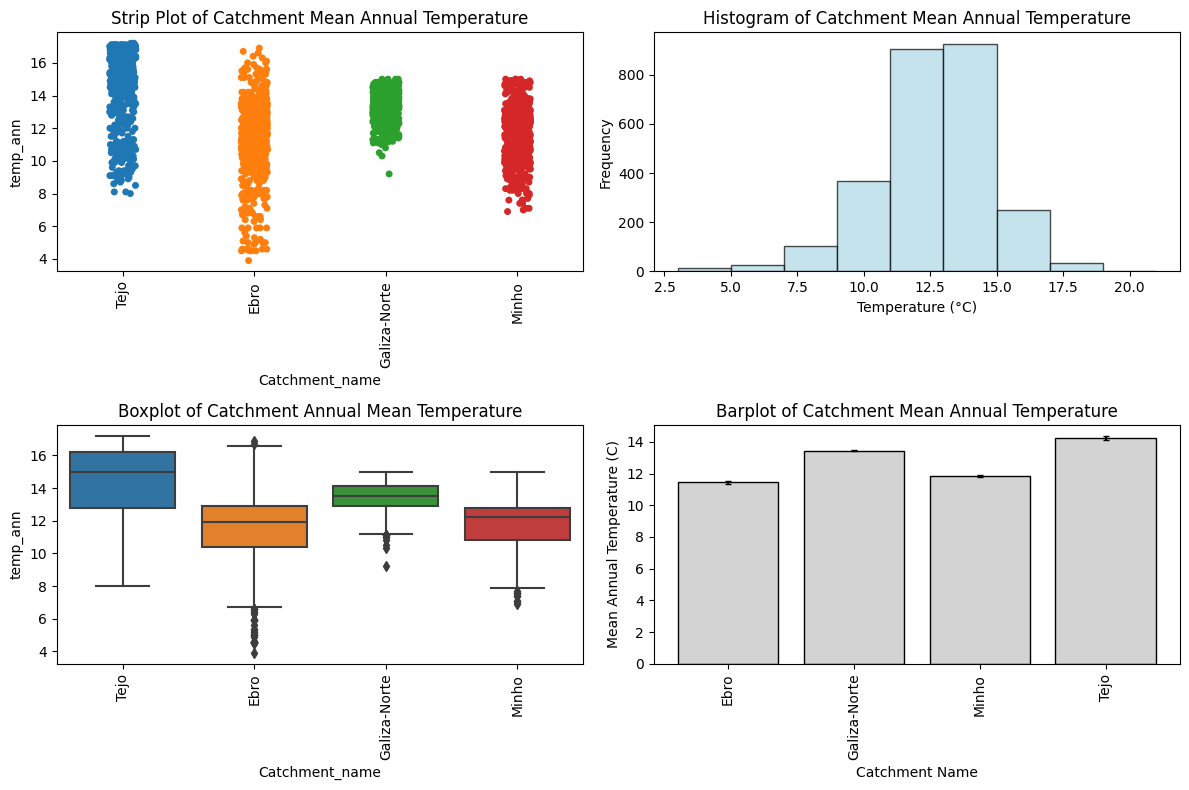

In [54]:
# all plots
# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Stripplot
sns.stripplot(x="Catchment_name", y="temp_ann", data=top4_df, ax=axes[0, 0])
axes[0, 0].set_title('Strip Plot of Catchment Mean Annual Temperature')
axes[0, 0].tick_params(axis='x', rotation=90)

# Histogram
column_name = "temp_ann"
data = top4_df[column_name].dropna()
axes[0, 1].hist(data, bins=bins, edgecolor='black', alpha=0.7, color='lightblue')
axes[0, 1].set_title("Histogram of Catchment Mean Annual Temperature")
axes[0, 1].set_xlabel("Temperature (°C)")
axes[0, 1].set_ylabel("Frequency")

# Boxplot
sns.boxplot(x="Catchment_name", y="temp_ann", data=top4_df, ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Catchment Annual Mean Temperature")
axes[1, 0].tick_params(axis='x', rotation=90)

# Barplot
axes[1, 1].bar(mean_temps['Catchment_name'], mean_temps['temp_ann'], yerr=mean_temps['SE'],
               capsize=2, color='lightgray', edgecolor='black', align='center')
axes[1, 1].set_xlabel('Catchment Name')
axes[1, 1].set_ylabel('Mean Annual Temperature (C)')
axes[1, 1].set_title('Barplot of Catchment Mean Annual Temperature')
axes[1, 1].tick_params(axis='x', rotation=90)


# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

In [ ]:
# TODO
# I also challenge you to construct a plot that shows how the mean value of temp_ann varies with the size
# of random samplings of sites. Take 1000 random samples with replacement of increasing sample sizes
# (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each
# sample and use an appropriate visualization to show how many samples will we need to have a good
# estimate of the population mean
